In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
!pwd

/Users/edlapaniguel/Desktop/ironhack/2.Modulo_1/Projeto_01


In [115]:
!pip install Matplotlib

In [116]:
#bataques por local(tem pais, area e localização),sexo(pelo nome da para verificar tbm),atividade, data, tipo, age, fatalidade, tipo de tubarão.
#Tirar colunas Unnamed22 e Unnamed23
#Tirar linhas com Nan - ate a linha 6301 tem info, da 6302 para o fim  é so NaN. 
#Tirar coluna nome 
#Primeiro carreguei TODO o doc pra ver, visual, mesmo
#Passei value_counts em todas as colunas, investigação, depois que escolhi apaguei para não pesar muito
#Tentar usar site da pop de tubaroes no mundo cruzando pais, area e localização com NaN do especie
#Esquece tipo de tubarão - coluna species
#Sex ajustar a colunacom os que estavam N, .,  lli - F era 12% e M 88%
#Years #-1800 - 1800 - 1850 - 1900 - 1950 - 2000 - 2000+ ( nova coluna)

In [117]:
attacks = pd.read_csv('attacks.csv', encoding="ISO-8859-1")
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [118]:
attacks.info()
#tras as linhas preenchidas, as não nulas, NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [119]:
attacks.isnull().sum()
# a soma de linhas nulas pra cada coluna, as NaN

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [120]:
df_bkp = attacks.copy()

In [121]:
attacks.dropna(how='all', inplace=True) 
attacks.shape
#tira apenas os que nao tem nenhuma Nan

(8703, 24)

In [122]:
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [123]:
attacks.columns = [column.lower() for column in attacks.columns]
attacks.columns = [column.replace(' ','_') for column in attacks.columns]


In [124]:
attacks.rename(columns={'sex_': 'sex', 'species_':'species'}, inplace=True)


In [125]:
attacks.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [126]:
attacks.drop(columns=['unnamed:_22','unnamed:_23'], inplace=True)


In [127]:
attacks.columns


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order'],
      dtype='object')

In [128]:
attacks.drop(columns=['case_number','date','name','injury', 'species','investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number.1', 'case_number.2', 'original_order'], inplace=True)


In [129]:
attacks.iloc[7000:8000]


,year,type,country,area,location,activity,sex,age,fatal_(y/n),time
7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
attacks.dropna(how='all', inplace=True) 
attacks.shape
#novamente depois que mexi no DF.

(6302, 10)

In [131]:
attacks.columns


Index(['year', 'type', 'country', 'area', 'location', 'activity', 'sex', 'age',
       'fatal_(y/n)', 'time'],
      dtype='object')

In [132]:
attacks['sex'].value_counts()


M      5094
F       637
N         2
M         2
lli       1
.         1
Name: sex, dtype: int64

In [133]:
attacks['sex'].replace('N','M', inplace=True)

In [134]:
attacks['sex'].replace('lli','F', inplace=True)

In [135]:
attacks['sex'].replace('M ','M', inplace=True)

In [136]:
attacks['sex'].replace('.','M', inplace=True)

In [137]:
attacks['sex'].value_counts().sum()
#5737 preenchidos, com valor

5737

In [138]:
attacks['sex'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
6297    False
6298    False
6299    False
6300    False
6301    False
Name: sex, Length: 6302, dtype: bool

In [139]:
attacks['sex'].isnull().sum()
#2966 sem valor, NaN

565

In [140]:
attacks['country'].value_counts()

USA                         2229
AUSTRALIA                   1338
SOUTH AFRICA                 579
PAPUA NEW GUINEA             134
NEW ZEALAND                  128
                            ... 
BAHREIN                        1
BAY OF BENGAL                  1
COMOROS                        1
TASMAN SEA                     1
Between PORTUGAL & INDIA       1
Name: country, Length: 212, dtype: int64

In [141]:
attacks['country'].isnull().sum()
#2451

50

In [142]:
attacks['country'].replace('RED SEA / INDIAN OCEAN','UNKNOWN', inplace=True)
attacks['country'].replace('RED SEA?','UNKNOWN', inplace=True)
attacks['country'].replace('INDIAN OCEAN?','UNKNOWN', inplace=True)
attacks['country'].replace('ASIA?','UNKNOWN', inplace=True)
attacks['country'].replace('SOLOMON ISLANDS / VANUATU','UNKNOWN', inplace=True)
attacks['country'].replace('ANDAMAN / NICOBAR ISLANDAS','UNKNOWN', inplace=True)
attacks['country'].replace('EGYPT / ISRAEL','UNKNOWN', inplace=True)
attacks['country'].replace('EQUATORIAL GUINEA / CAMEROON','UNKNOWN', inplace=True)
attacks['country'].replace('ITALY / CROATIA','UNKNOWN', inplace=True)
attacks['country'].replace('IRAN / IRAQ','UNKNOWN', inplace=True)
attacks['country'].replace('ST HELENA, BRITISH OVERSEAS TERRITORY','UNKNOWN', inplace=True)
attacks['country'].replace('DIEGO GARCIA','UNKNOWN', inplace=True)
attacks['country'].replace('BETWEEN PORTUGAL & INDIA','UNKNOWN', inplace=True)
attacks['country'].replace('SUDAN?','UNKNOWN', inplace=True)
attacks['country'].replace('OCEAN','UNKNOWN', inplace=True)
attacks['country'].replace(' PHILIPPINES','PHILIPPINES', inplace=True)
attacks['country'].replace(' TONGA','TONGA', inplace=True)
    

In [143]:
# attacks['country'] = [column.upper() for column in attacks.columns]
attacks['country'] = attacks['country'].str.upper() 


In [144]:
# pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_rows', None)


In [145]:
attacks['year'].isnull().sum()

2

In [146]:
attacks['year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1801.0      1
1638.0      1
1834.0      1
1723.0      1
1786.0      1
Name: year, Length: 249, dtype: int64

In [147]:
#-1800 - 1800 - 1850 - 1900 - 1950 - 2000 - 2000+ ( nova coluna)

#df.loc[(df['coluna nome'] == ou > ou <= condição), 'nome nova coluna'] = 1
attacks.loc[(attacks['year'] <= 1800),'year_grouped'] = '- 1800'
attacks.loc[((attacks['year'] > 1800) & (attacks['year'] <= 1850)),'year_grouped'] = '1800 - 1850'
attacks.loc[((attacks['year'] > 1850) & (attacks['year'] <= 1900)),'year_grouped'] = '1850 - 1900'
attacks.loc[((attacks['year'] > 1900) & (attacks['year'] <= 1950)),'year_grouped'] = '1900 - 1950'
attacks.loc[((attacks['year'] > 1950) & (attacks['year'] <= 2000)),'year_grouped'] = '1950 - 2000'
attacks.loc[(attacks['year'] > 2000),'year_grouped'] = '2000 +'
attacks.loc[(attacks['year'].isnull()),'year_grouped'] = 'UNKNOWN'


In [148]:
attacks['type'].isnull().sum()

4

In [149]:
attacks['type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [150]:
attacks['type'].replace('Invalid','UNKNOWN', inplace=True)
attacks['type'].replace('Sea Disaster','UNKNOWN', inplace=True)
attacks['type'].replace('Boating','UNKNOWN', inplace=True)
attacks['type'].replace('Boat','UNKNOWN', inplace=True)
attacks['type'].replace('Questionable','UNKNOWN', inplace=True)
attacks['type'].replace('Boatomg ','UNKNOWN', inplace=True)
attacks['type'] = attacks['type'].str.upper() 


In [151]:
attacks['fatal_(y/n)'].isnull().sum()

539

In [152]:
attacks['fatal_(y/n)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
y             1
2017          1
N             1
Name: fatal_(y/n), dtype: int64

In [153]:
attacks['fatal_(y/n)'].replace(' N','N', inplace=True)
attacks['fatal_(y/n)'].replace('N ','N', inplace=True)
attacks['fatal_(y/n)'].replace('M','N', inplace=True)
attacks['fatal_(y/n)'].replace('y','Y', inplace=True)
attacks['fatal_(y/n)'].replace('2017','UNKNOWN', inplace=True)
attacks['fatal_(y/n)'] = attacks['fatal_(y/n)'].str.upper()
attacks['fatal_(y/n)'].fillna('UNKNOWN', inplace=True)


In [154]:
attacks['age'].isnull().sum()

2831

In [155]:
attacks['age'].value_counts()

17         154
18         150
19         142
20         141
15         139
          ... 
             1
60s          1
(adult)      1
46 & 34      1
84           1
Name: age, Length: 157, dtype: int64

In [156]:
attacks['age'].dtypes

dtype('O')

In [157]:
attacks['age'].dtypes == 'float64'

False

In [158]:
attacks['age'].dtypes == 'int64'

False

In [159]:
attacks['age'].dtypes == 'object'

True

In [160]:
attacks['age'].fillna(999, inplace=True)

In [161]:


attacks['age'] = pd.to_numeric(attacks['age'], errors = 'coerce')

In [162]:
attacks['age'].isna().sum()

102

In [163]:
attacks['age'].fillna(999, inplace=True)

In [164]:
#-12 , 17, 25, 35, 45, 50, 55, 75+  unknown


attacks.loc[(attacks['age'] <= 12),'age_grouped'] = '- 12'
attacks.loc[((attacks['age'] > 12) & (attacks['age'] <= 17)),'age_grouped'] = '12 - 17'
attacks.loc[((attacks['age'] > 17) & (attacks['age'] <= 25)),'age_grouped'] = '17 - 25'
attacks.loc[((attacks['age'] > 25) & (attacks['age'] <= 35)),'age_grouped'] = '25 - 35'
attacks.loc[((attacks['age'] > 35) & (attacks['age'] <= 45)),'age_grouped'] = '35 - 45'
attacks.loc[((attacks['age'] > 45) & (attacks['age'] <= 55)),'age_grouped'] = '45 - 55'
attacks.loc[((attacks['age'] > 55) & (attacks['age'] <= 65)),'age_grouped'] = '55 - 65'
attacks.loc[((attacks['age'] > 65) & (attacks['age'] <= 75)),'age_grouped'] = '65 - 75'
attacks.loc[(attacks['age'] > 75),'age_grouped'] = '75 +'
attacks.loc[(attacks['age'] == 999),'age_grouped'] = 'UNKNOWN'



In [165]:
attacks.head()

,year,type,country,area,location,activity,sex,age,fatal_(y/n),time,year_grouped,age_grouped
0,2018.0,UNKNOWN,USA,California,"Oceanside, San Diego County",Paddling,F,57.0,N,18h00,2000 +,55 - 65
1,2018.0,UNPROVOKED,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11.0,N,14h00 -15h00,2000 +,- 12
2,2018.0,UNKNOWN,USA,Hawaii,"Habush, Oahu",Surfing,M,48.0,N,07h45,2000 +,45 - 55
3,2018.0,UNPROVOKED,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,999.0,N,NaN,2000 +,UNKNOWN
4,2018.0,PROVOKED,MEXICO,Colima,La Ticla,Free diving,M,999.0,N,NaN,2000 +,UNKNOWN


In [166]:
attacks.drop(columns=['year','age'], inplace=True,)


In [167]:
attacks.head()

,type,country,area,location,activity,sex,fatal_(y/n),time,year_grouped,age_grouped
0,UNKNOWN,USA,California,"Oceanside, San Diego County",Paddling,F,N,18h00,2000 +,55 - 65
1,UNPROVOKED,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,N,14h00 -15h00,2000 +,- 12
2,UNKNOWN,USA,Hawaii,"Habush, Oahu",Surfing,M,N,07h45,2000 +,45 - 55
3,UNPROVOKED,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,N,NaN,2000 +,UNKNOWN
4,PROVOKED,MEXICO,Colima,La Ticla,Free diving,M,N,NaN,2000 +,UNKNOWN


In [168]:
new_order = [5,9,1,2,3,4,7,0,6,8]
attacks = attacks[attacks.columns[new_order]]
attacks.head(50)

,sex,age_grouped,country,area,location,activity,time,type,fatal_(y/n),year_grouped
0,F,55 - 65,USA,California,"Oceanside, San Diego County",Paddling,18h00,UNKNOWN,N,2000 +
1,F,- 12,USA,Georgia,"St. Simon Island, Glynn County",Standing,14h00 -15h00,UNPROVOKED,N,2000 +
2,M,45 - 55,USA,Hawaii,"Habush, Oahu",Surfing,07h45,UNKNOWN,N,2000 +
3,M,UNKNOWN,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,NaN,UNPROVOKED,N,2000 +
4,M,UNKNOWN,MEXICO,Colima,La Ticla,Free diving,NaN,PROVOKED,N,2000 +
5,M,UNKNOWN,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,NaN,UNPROVOKED,N,2000 +
6,M,17 - 25,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Late afternoon,UNPROVOKED,Y,2000 +
7,M,45 - 55,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,UNPROVOKED,N,2000 +
8,M,12 - 17,USA,Florida,"Cocoa Beach, Brevard County",Walking,17h00,UNPROVOKED,N,2000 +
9,M,- 12,USA,Florida,"Daytona Beach, Volusia County",Standing,14h00,UNPROVOKED,N,2000 +


In [169]:
attacks['activity'].isnull().sum()

544

In [170]:
top10=attacks['activity'].value_counts()[: 10].index
# 5758 non-null   object


In [171]:
attacks.shape

(6302, 10)

In [172]:
mask = attacks['activity'].isin(top10)
mask

0       False
1        True
2        True
3        True
4       False
        ...  
6297     True
6298    False
6299     True
6300    False
6301     True
Name: activity, Length: 6302, dtype: bool

In [173]:
attacks[mask]

,sex,age_grouped,country,area,location,activity,time,type,fatal_(y/n),year_grouped
1,F,- 12,USA,Georgia,"St. Simon Island, Glynn County",Standing,14h00 -15h00,UNPROVOKED,N,2000 +
2,M,45 - 55,USA,Hawaii,"Habush, Oahu",Surfing,07h45,UNKNOWN,N,2000 +
3,M,UNKNOWN,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,NaN,UNPROVOKED,N,2000 +
6,M,17 - 25,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Late afternoon,UNPROVOKED,Y,2000 +
7,M,45 - 55,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,UNPROVOKED,N,2000 +
...,...,...,...,...,...,...,...,...,...,...
6295,M,UNKNOWN,AUSTRALIA,NaN,NaN,Fishing,NaN,UNPROVOKED,Y,- 1800
6296,M,UNKNOWN,AUSTRALIA,New South Wales,,Swimming,NaN,UNPROVOKED,Y,- 1800
6297,M,UNKNOWN,AUSTRALIA,Western Australia,Roebuck Bay,Diving,NaN,UNPROVOKED,Y,- 1800
6299,M,UNKNOWN,USA,North Carolina,Ocracoke Inlet,Swimming,NaN,UNPROVOKED,Y,- 1800


In [174]:
attacks = attacks[mask]

In [175]:
attacks.head(100)

,sex,age_grouped,country,area,location,activity,time,type,fatal_(y/n),year_grouped
1,F,- 12,USA,Georgia,"St. Simon Island, Glynn County",Standing,14h00 -15h00,UNPROVOKED,N,2000 +
2,M,45 - 55,USA,Hawaii,"Habush, Oahu",Surfing,07h45,UNKNOWN,N,2000 +
3,M,UNKNOWN,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,NaN,UNPROVOKED,N,2000 +
6,M,17 - 25,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Late afternoon,UNPROVOKED,Y,2000 +
7,M,45 - 55,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,NaN,UNPROVOKED,N,2000 +
...,...,...,...,...,...,...,...,...,...,...
138,F,25 - 35,BAHAMAS,New Providence,Athol Island,Snorkeling,Shortly before 12h00,UNPROVOKED,N,2000 +
142,M,35 - 45,UNITED ARAB EMIRATES,"Sharjah,",Khor Fakkan,Spearfishing,Morning,UNPROVOKED,N,2000 +
144,M,25 - 35,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,17h00,UNPROVOKED,Y,2000 +
145,F,17 - 25,USA,California,"Sunset Beach, Orange County",Surfing,14h30,UNKNOWN,UNKNOWN,2000 +


In [176]:
attacks.shape

(3306, 10)

In [177]:
attacks['sex'].value_counts()

M    2748
F     377
Name: sex, dtype: int64

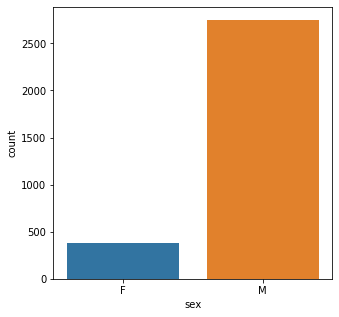

In [178]:
plt.figure(figsize=(5,5))
sns.countplot('sex', data=attacks)


In [179]:
attacks['age_grouped'].value_counts()

UNKNOWN    1248
17 - 25     603
12 - 17     406
25 - 35     398
35 - 45     251
45 - 55     155
- 12        153
55 - 65      61
65 - 75      25
75 +          6
Name: age_grouped, dtype: int64

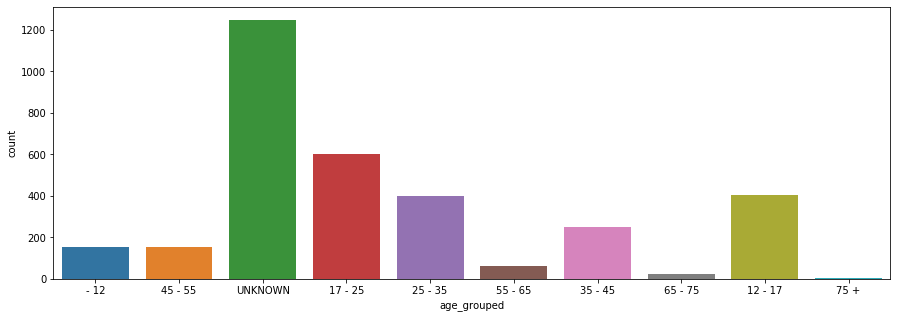

In [180]:
plt.figure(figsize=(15,5))
sns.countplot('age_grouped', data=attacks)

In [181]:
attacks['activity'].value_counts()

Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: activity, dtype: int64

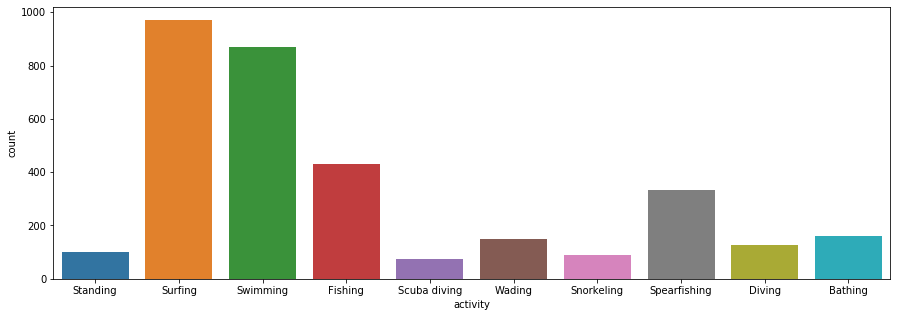

In [182]:
plt.figure(figsize=(15,5))
sns.countplot('activity', data=attacks)

In [183]:
attacks['time'].value_counts()

Afternoon    108
11h00         85
Morning       82
15h00         72
16h00         62
            ... 
08h35          1
14h37          1
10h27          1
09h40          1
11h06          1
Name: time, Length: 275, dtype: int64

In [184]:
!pip install Pillow

In [185]:
from PIL import Image

In [186]:
!pwd

/Users/edlapaniguel/Desktop/ironhack/2.Modulo_1/Projeto_01


In [187]:
img=Image.open('ig.png')

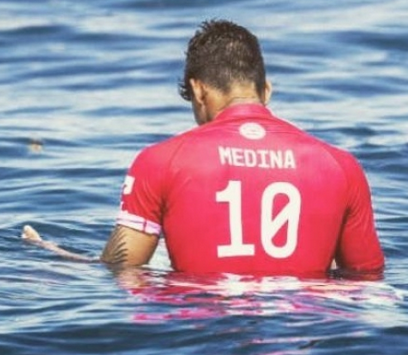

In [188]:
img

In [ ]:
#Another one bites the dust!